### Import packages

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("country_vaccinations.csv")
df.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Algeria,DZA,2021-01-29,0.0,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,Sputnik V,Ministry of Health,https://www.aps.dz/regions/116777-blida-covid-...
1,Algeria,DZA,2021-01-30,30.0,NaN,NaN,30.0,30.0,0.00,NaN,NaN,1.0,Sputnik V,Ministry of Health,https://www.aps.dz/regions/116777-blida-covid-...
2,Andorra,AND,2021-01-25,576.0,576.0,NaN,NaN,NaN,0.75,0.75,NaN,NaN,Pfizer/BioNTech,Government of Andorra,https://www.govern.ad/comunicats/item/12379-se...
3,Andorra,AND,2021-01-26,NaN,NaN,NaN,NaN,66.0,NaN,NaN,NaN,854.0,Pfizer/BioNTech,Government of Andorra,https://www.govern.ad/comunicats/item/12379-se...
4,Andorra,AND,2021-01-27,NaN,NaN,NaN,NaN,66.0,NaN,NaN,NaN,854.0,Pfizer/BioNTech,Government of Andorra,https://www.govern.ad/comunicats/item/12379-se...


### Inspect Data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2418 entries, 0 to 2417
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              2418 non-null   object 
 1   iso_code                             2189 non-null   object 
 2   date                                 2418 non-null   object 
 3   total_vaccinations                   1575 non-null   float64
 4   people_vaccinated                    1303 non-null   float64
 5   people_fully_vaccinated              756 non-null    float64
 6   daily_vaccinations_raw               1288 non-null   float64
 7   daily_vaccinations                   2321 non-null   float64
 8   total_vaccinations_per_hundred       1575 non-null   float64
 9   people_vaccinated_per_hundred        1303 non-null   float64
 10  people_fully_vaccinated_per_hundred  756 non-null    float64
 11  daily_vaccinations_per_million

In [5]:
df.shape

(2418, 15)

### Checking for missing values

In [6]:
for i in range(len(df.columns)):
    missing_data = df[df.columns[i]].isna().sum()
    perc = missing_data / len(df) * 100
    print(f'Feature {i+1}  {df.columns[i]} >> Missing entries: {missing_data}  |  Percentage: {round(perc, 2)}')

Feature 1  country >> Missing entries: 0  |  Percentage: 0.0
Feature 2  iso_code >> Missing entries: 229  |  Percentage: 9.47
Feature 3  date >> Missing entries: 0  |  Percentage: 0.0
Feature 4  total_vaccinations >> Missing entries: 843  |  Percentage: 34.86
Feature 5  people_vaccinated >> Missing entries: 1115  |  Percentage: 46.11
Feature 6  people_fully_vaccinated >> Missing entries: 1662  |  Percentage: 68.73
Feature 7  daily_vaccinations_raw >> Missing entries: 1130  |  Percentage: 46.73
Feature 8  daily_vaccinations >> Missing entries: 97  |  Percentage: 4.01
Feature 9  total_vaccinations_per_hundred >> Missing entries: 843  |  Percentage: 34.86
Feature 10  people_vaccinated_per_hundred >> Missing entries: 1115  |  Percentage: 46.11
Feature 11  people_fully_vaccinated_per_hundred >> Missing entries: 1662  |  Percentage: 68.73
Feature 12  daily_vaccinations_per_million >> Missing entries: 97  |  Percentage: 4.01
Feature 13  vaccines >> Missing entries: 0  |  Percentage: 0.0
Featu

<AxesSubplot:>

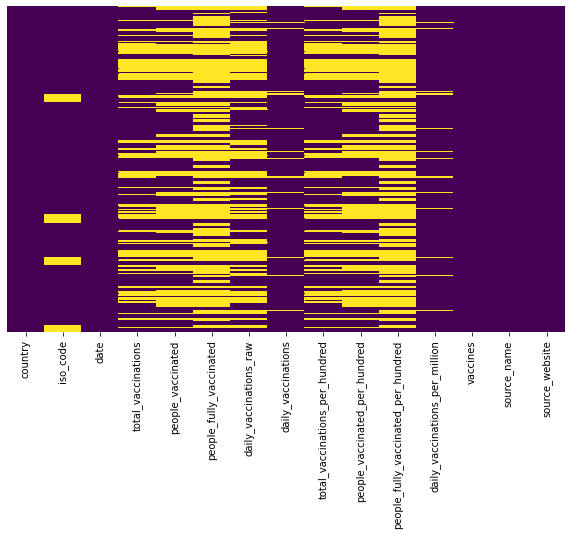

In [7]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isna(), cbar=False, cmap='viridis', yticklabels=False)


In [8]:
df.vaccines.value_counts()

Pfizer/BioNTech                          1057
Moderna, Pfizer/BioNTech                  624
Oxford/AstraZeneca, Pfizer/BioNTech       275
Pfizer/BioNTech, Sinopharm                 79
Sputnik V                                  79
Pfizer/BioNTech, Sinovac                   54
Sinovac                                    51
Sinopharm, Sinovac                         51
Oxford/AstraZeneca, Sinopharm              36
Oxford/AstraZeneca                         31
Pfizer/BioNTech, Sinopharm, Sputnik V      29
Covaxin, Oxford/AstraZeneca                23
Oxford/AstraZeneca, Sinovac                22
Sinopharm                                   7
Name: vaccines, dtype: int64

### Adding date rows and others as NA

In [9]:
dates = df.date.unique().tolist()
countries = df.country.unique().tolist()

In [10]:
dates.sort()

In [11]:
df_empty = pd.DataFrame()
df_empty

""


In [12]:
for each_c in countries: 
    df_new = pd.DataFrame({'date': dates, 'country': each_c})
    df_empty = pd.concat([df_empty, df_new])
df_empty

,date,country
0,2020-12-13,Algeria
1,2020-12-14,Algeria
2,2020-12-15,Algeria
3,2020-12-16,Algeria
4,2020-12-17,Algeria
...,...,...
51,2021-02-02,Wales
52,2021-02-03,Wales
53,2021-02-04,Wales
54,2021-02-05,Wales


In [13]:
df = pd.concat([df, df_empty])

In [14]:
df = df.sort_values(by=['country','date'], ascending=True)

In [15]:
df = df.drop_duplicates(subset=['country', 'date'], keep="first")

In [16]:
df

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Algeria,NaN,2020-12-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Algeria,NaN,2020-12-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Algeria,NaN,2020-12-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Algeria,NaN,2020-12-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Algeria,NaN,2020-12-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2414,Wales,NaN,2021-02-02,463657.0,462497.0,1160.0,22951.0,21530.0,14.71,14.67,0.04,6829.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
2415,Wales,NaN,2021-02-03,491786.0,490570.0,1216.0,28129.0,22149.0,15.60,15.56,0.04,7025.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
2416,Wales,NaN,2021-02-04,524677.0,523042.0,1635.0,32891.0,23101.0,16.64,16.59,0.05,7327.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
2417,Wales,NaN,2021-02-05,559468.0,556997.0,2471.0,34791.0,25788.0,17.74,17.67,0.08,8179.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...


### Fill NAs with before/after values

In [17]:
df.drop(['iso_code'], axis = 1, inplace = True)

In [18]:
df['total_vaccinations'] = df.groupby(['country'], sort=False)['total_vaccinations'].apply(lambda x: x.ffill().bfill())

In [19]:
df['people_vaccinated'] = df.groupby(['country'], sort=False)['people_vaccinated'].apply(lambda x: x.ffill().bfill())

In [20]:
df['people_fully_vaccinated'] = df.groupby(['country'], sort=False)['people_fully_vaccinated'].apply(lambda x: x.ffill().bfill())

In [21]:
df['vaccines'] = df.groupby(['country'], sort=False)['vaccines'].apply(lambda x: x.ffill().bfill())

In [22]:
df['people_vaccinated_per_hundred'] = df.groupby(['country'], sort=False)['people_vaccinated_per_hundred'].apply(lambda x: x.ffill().bfill())

In [23]:
df['total_vaccinations_per_hundred'] = df.groupby(['country'], sort=False)['total_vaccinations_per_hundred'].apply(lambda x: x.ffill().bfill())

In [24]:
df['people_fully_vaccinated_per_hundred'] = df.groupby(['country'], sort=False)['people_fully_vaccinated_per_hundred'].apply(lambda x: x.ffill().bfill())

In [25]:
df['daily_vaccinations_per_million'] = df.groupby(['country'], sort=False)['daily_vaccinations_per_million'].apply(lambda x: x.ffill().bfill())

<AxesSubplot:>

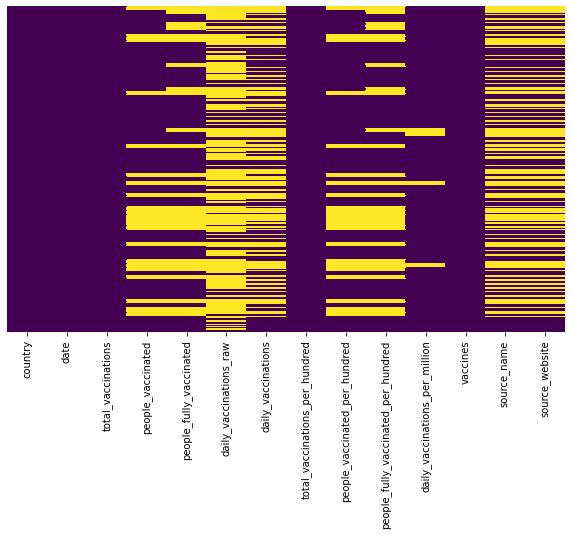

In [26]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isna(), cbar=False, cmap='viridis', yticklabels=False)

Now that all columns with continuous values based on previous values have been filled. There are still a lot of missing data, but this time we can fill them with 0s, because values are missing because there is no record of data for these individual countries. 

### Fill NAs with 0s

In [27]:
df = df.fillna(0)

<AxesSubplot:>

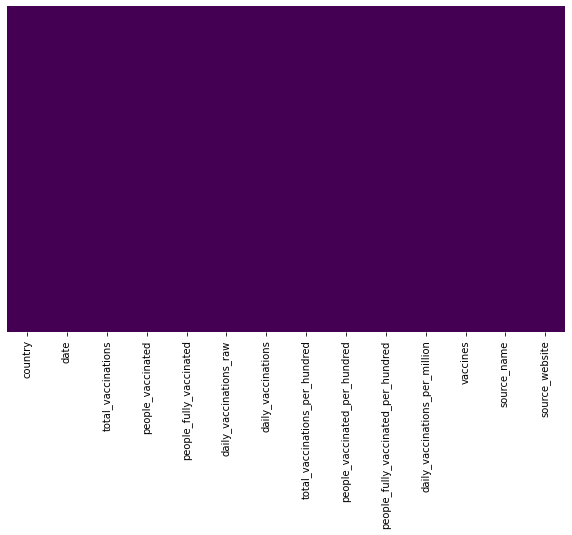

In [28]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isna(), cbar=False, cmap='viridis', yticklabels=False)

### Dropping unnecessary columns

In [29]:
df.drop(['daily_vaccinations_raw', 'source_name', 'source_website'], axis=1, inplace = True)

In [30]:
df.head()

,country,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines
0,Algeria,2020-12-13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Sputnik V
1,Algeria,2020-12-14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Sputnik V
2,Algeria,2020-12-15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Sputnik V
3,Algeria,2020-12-16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Sputnik V
4,Algeria,2020-12-17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Sputnik V


### Saving the cleaned csv file

In [31]:
df.to_csv('vaccine_cleaned.csv', index=False)

In [32]:
df1 = pd.read_csv('vaccine_cleaned.csv')

In [33]:
df1[df1["country"]=="China"]

,country,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines
784,China,2020-12-13,1500000.0,1500000.0,0.0,0.0,0.10,0.10,0.0,130.0,"Sinopharm, Sinovac"
785,China,2020-12-14,1500000.0,1500000.0,0.0,0.0,0.10,0.10,0.0,130.0,"Sinopharm, Sinovac"
786,China,2020-12-15,1500000.0,1500000.0,0.0,0.0,0.10,0.10,0.0,130.0,"Sinopharm, Sinovac"
787,China,2020-12-16,1500000.0,1500000.0,0.0,187500.0,0.10,0.10,0.0,130.0,"Sinopharm, Sinovac"
788,China,2020-12-17,1500000.0,1500000.0,0.0,187500.0,0.10,0.10,0.0,130.0,"Sinopharm, Sinovac"
789,China,2020-12-18,1500000.0,1500000.0,0.0,187500.0,0.10,0.10,0.0,130.0,"Sinopharm, Sinovac"
790,China,2020-12-19,1500000.0,1500000.0,0.0,187500.0,0.10,0.10,0.0,130.0,"Sinopharm, Sinovac"
791,China,2020-12-20,1500000.0,1500000.0,0.0,187500.0,0.10,0.10,0.0,130.0,"Sinopharm, Sinovac"
792,China,2020-12-21,1500000.0,1500000.0,0.0,187500.0,0.10,0.10,0.0,130.0,"Sinopharm, Sinovac"
793,China,2020-12-22,1500000.0,1500000.0,0.0,187500.0,0.10,0.10,0.0,130.0,"Sinopharm, Sinovac"


### Writing above code into functions

In [1]:
def read_file(csv):
    df = pd.read_csv(csv)
    return df

In [7]:
def date_unify(df):
    dates = df.date.unique().tolist()
    countries = df.country.unique().tolist()
    dates.sort()
    df_empty = pd.DataFrame()
    for each_c in countries: 
        df_new = pd.DataFrame({'date': dates, 'country': each_c})
        df_empty = pd.concat([df_empty, df_new])
    df = pd.concat([df, df_empty])
    df = df.sort_values(by=['country','date'], ascending=True)
    df = df.drop_duplicates(subset=['country', 'date'], keep="first")
    return df

In [8]:
def fill_na(df):
    df.drop(['iso_code'], axis = 1, inplace = True)
    df['total_vaccinations'] = df.groupby(['country'], sort=False)['total_vaccinations'].apply(lambda x: x.ffill().bfill())
    df['people_vaccinated'] = df.groupby(['country'], sort=False)['people_vaccinated'].apply(lambda x: x.ffill().bfill())
    df['people_fully_vaccinated'] = df.groupby(['country'], sort=False)['people_fully_vaccinated'].apply(lambda x: x.ffill().bfill())
    df['vaccines'] = df.groupby(['country'], sort=False)['vaccines'].apply(lambda x: x.ffill().bfill())
    df['people_vaccinated_per_hundred'] = df.groupby(['country'], sort=False)['people_vaccinated_per_hundred'].apply(lambda x: x.ffill().bfill())
    df['total_vaccinations_per_hundred'] = df.groupby(['country'], sort=False)['total_vaccinations_per_hundred'].apply(lambda x: x.ffill().bfill())
    df['people_fully_vaccinated_per_hundred'] = df.groupby(['country'], sort=False)['people_fully_vaccinated_per_hundred'].apply(lambda x: x.ffill().bfill())
    df['daily_vaccinations_per_million'] = df.groupby(['country'], sort=False)['daily_vaccinations_per_million'].apply(lambda x: x.ffill().bfill())
    df = df.fillna(0)
    df.drop(['daily_vaccinations_raw', 'source_name', 'source_website'], axis=1, inplace = True)
    return df

In [9]:
def save_file(df):
    df.to_csv('vaccine_cleaned.csv', index=False)